## Please complete before submission:

**Name:** Zeyan Liang

**Student Number:** 2627888L

# TextAs Data Coursework

Please fill in this Google Colab by following the prompts from the coursework specification document and inserting your code in each relevant section.

- You should submit this notebook together with your report. (Two separate files)
- Specifcally you will submit **both a PDF with the report (so we can easily read it) and a .ipynb file containing the source code of your experiments as evidence**. Please do clean up your code where possible before submitting it.
- You may add whatever additional code and text blocks as needed (perhaps with [nice formatting](https://colab.research.google.com/notebooks/markdown_guide.ipynb)). Please keep the major headings (for the question numbers) the same.

As with labs, please remember to **Save a Copy to Drive** when you start working on this so that it is saved. Completing the labs provides essential knowledge for the successful completion of the coursework. 

## Downloading and loading Data

This code loads the prepared split of the Reddit data into training, validation and testing set.

In [ ]:
!wget -O reddit_data_split.zip https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EapVNOIV84tPnQuuFBNgG9UBYIWipQ9JL4QTfSgRtIacBw?download=1
!unzip -o reddit_data_split.zip

--2022-03-12 05:50:08--  https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EapVNOIV84tPnQuuFBNgG9UBYIWipQ9JL4QTfSgRtIacBw?download=1
Resolving gla-my.sharepoint.com (gla-my.sharepoint.com)... 52.105.15.53
Connecting to gla-my.sharepoint.com (gla-my.sharepoint.com)|52.105.15.53|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/jake_lever_glasgow_ac_uk/Documents/Teaching/reddit_data_split.zip [following]
--2022-03-12 05:50:09--  https://gla-my.sharepoint.com/personal/jake_lever_glasgow_ac_uk/Documents/Teaching/reddit_data_split.zip
Reusing existing connection to gla-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 468327 (457K) [application/x-zip-compressed]
Saving to: ‘reddit_data_split.zip’

reddit_data_split.z 100%[===================>] 457.35K   876KB/s    in 0.5s    

2022-03-12 05:50:10 (876 KB/s) - ‘reddit_data_split.zip’ saved [468327/468327]

Archive:  reddit_data_split.zip
  inflating: reddi

In [ ]:
import json

with open('reddit_train.json') as f:
    train_data = json.load(f)
with open('reddit_val.json') as f:
    validation_data = json.load(f)
with open('reddit_test.json') as f:
    test_data = json.load(f)

print("Number of posts in training data:", len(train_data))
print("Number of posts in validation data:", len(validation_data))
print("Number of posts in test data:", len(test_data))

Number of posts in training data: 1200
Number of posts in validation data: 400
Number of posts in test data: 400


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!/opt/bin/nvidia-smi

Sat Mar 12 05:50:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    28W /  70W |    264MiB / 15109MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Q1:

In [ ]:
import pandas as pd
import numpy as np                                                               
import matplotlib.pyplot as plt

train_dataframe = pd.read_json('reddit_train.json')
validation_dataframe = pd.read_json('reddit_val.json')
test_dataframe = pd.read_json('reddit_test.json')
train_dataframe.head(20)

,subreddit,title,score,id,author,body
0,PS4,Can I get banned for having a game that I didn...,0,queqfu,XC-XERZ,"Long story short, I saw ESO in my library, dow..."
1,pcgaming,How to get a Kinect sensor to work with a PC?,0,1eujoa,ZachTheKing,I have seen a video online where someone took ...
2,NintendoSwitch,Switch Only Charges with GoPro Cable,5,m00bx7,BluePenguin2002,"Hi, hope this is the right place/way to post t..."
3,antiMLM,L’Occitane going down MLM route?,15,q13pvx,100fluffyclouds,After buying a majority share in Limelight/Alc...
4,HydroHomies,Guys i need your help,2,rxiv2g,Epicskeleton53,Is it ok for me to drink coffee in the morning...
5,PS4,Ps4 is slowly dying and I am not sure what to do,7,qgnfue,just-a-ham,My PS4 is about 7 years old and about 2 weeks ...
6,HydroHomies,I'm a soda drinker repenting of my heathen ways,2,qlojyj,TheNonchalantZealot,...but I need a bit of help.\nAre there any re...
7,Coffee,How’s the Bar Keeper’s Friend Coffee cleaner?,20,mdfczd,carsknivesbeer,Has anyone tried it? I buy the regular BKF by ...
8,pcgaming,Is there a word for the thing where you go fro...,10,qlwmm3,InvertedReflexes,"Like I went from playing Skyrim on Medium, bou..."
9,xbox,Teredo Client,3,hzh0va,n0tjosh,Teredo Client hasn't been working properly for...


In [ ]:
test_dataframe.head(20)

,subreddit,title,score,id,author,body
0,Coffee,Best Indie Coffee Brands that have K-Cups?,0,3s7usq,GrandRapidsCreative,I know most aren't the biggest fan of K-Cups a...
1,NintendoSwitch,How do you decide when to keep playing or when...,125,r8luun,windlep7,I know the obvious answer is to give up if you...
2,xbox,"So I’m relatively new on Xbox, and have a ques...",1,qwzis0,GoblinGuide93,I was playing infinite with friends in the par...
3,tea,Best gyokuro vendors in the US?,5,m1m3as,SocioDexter70,Ive only ever tried Ippodo since they have a U...
4,antiMLM,"My Mary Kay hun neighbor has a ""no soliciting""...",1038,pg5gs0,OkWallaby0009,I guess she doesn't like to be bothered by peo...
5,tea,Where to source pu'er from the early 90's?,5,pltrxl,SupremeCommander117,I have found lots of tea apparently from the e...
6,antiMLM,Are there any MLM’s that target men?,7,l9lzlq,jhococo,I’m curious! Where are the male huns? Or maybe...
7,Coffee,I modded my Hario Pro grinder to give it stepl...,12,rtt0x9,g4vr0che,I can't believe I didn't think about this soon...
8,pcgaming,Fanatical Sci-fi Mystery Bundle (Steam Keys) (...,0,n6epqx,minktravis65,STAR WARS Jedi Knight - Jedi Academy \nP5XCR-V...
9,Coffee,Confused: 1:2 ratio doesn't make sense for a d...,0,ky9hif,lifeisreallygoodnow,We are told that for an espresso use the 1:2 r...


### Q1a:

In [ ]:
count_label_train = train_dataframe.groupby('subreddit')['subreddit'].count()
count_label_validation = validation_dataframe.groupby('subreddit')['subreddit'].count()
count_label_test = test_dataframe.groupby('subreddit')['subreddit'].count()
subreddit_list = []
train_list = []
validation_list= []
test_list = []
for i in count_label_train.keys():
    subreddit_list.append(i)
for i in count_label_train:
    train_list.append(i)
for i in count_label_validation:
    validation_list.append(i)
for i in count_label_test:
    test_list.append(i)
validation_list

[42, 38, 52, 43, 43, 54, 43, 48, 37]

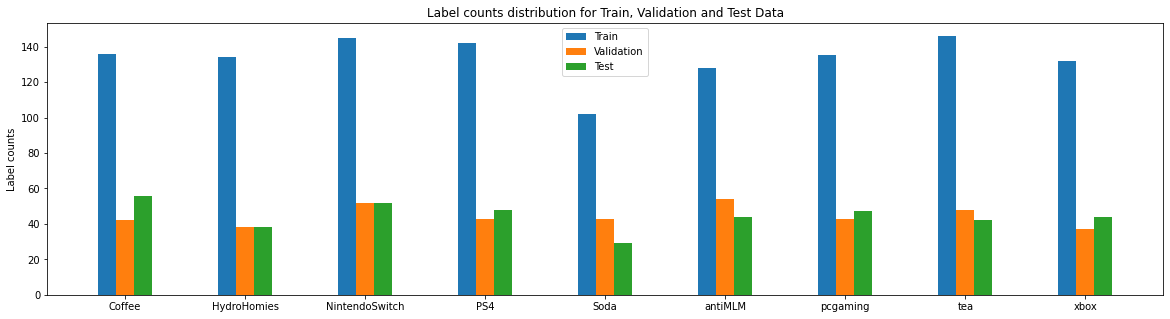

In [ ]:
x = np.arange(len(subreddit_list))
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 5))
rects1 = ax.bar(x - width, train_list, width, label='Train')
rects2 = ax.bar(x , validation_list, width, label='Validation')
rects3 = ax.bar(x + width , test_list, width, label='Test')
plt.title('Label counts distribution for Train, Validation and Test Data')
ax.set_ylabel('Label counts')
ax.set_xticks(x)
ax.set_xticklabels(subreddit_list)
ax.legend()

plt.show()

### Q1b:

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Dummy Classifier with strategy=most_frequent
                precision    recall  f1-score   support

        Coffee       0.00      0.00      0.00        56
   HydroHomies       0.00      0.00      0.00        38
NintendoSwitch       0.00      0.00      0.00        52
           PS4       0.00      0.00      0.00        48
          Soda       0.00      0.00      0.00        29
       antiMLM       0.00      0.00      0.00        44
      pcgaming       0.00      0.00      0.00        47
           tea       0.10      1.00      0.19        42
          xbox       0.00      0.00      0.00        44

      accuracy                           0.10       400
     macro avg       0.01      0.11      0.02       400
  weighted avg       0.01      0.10      0.02       400



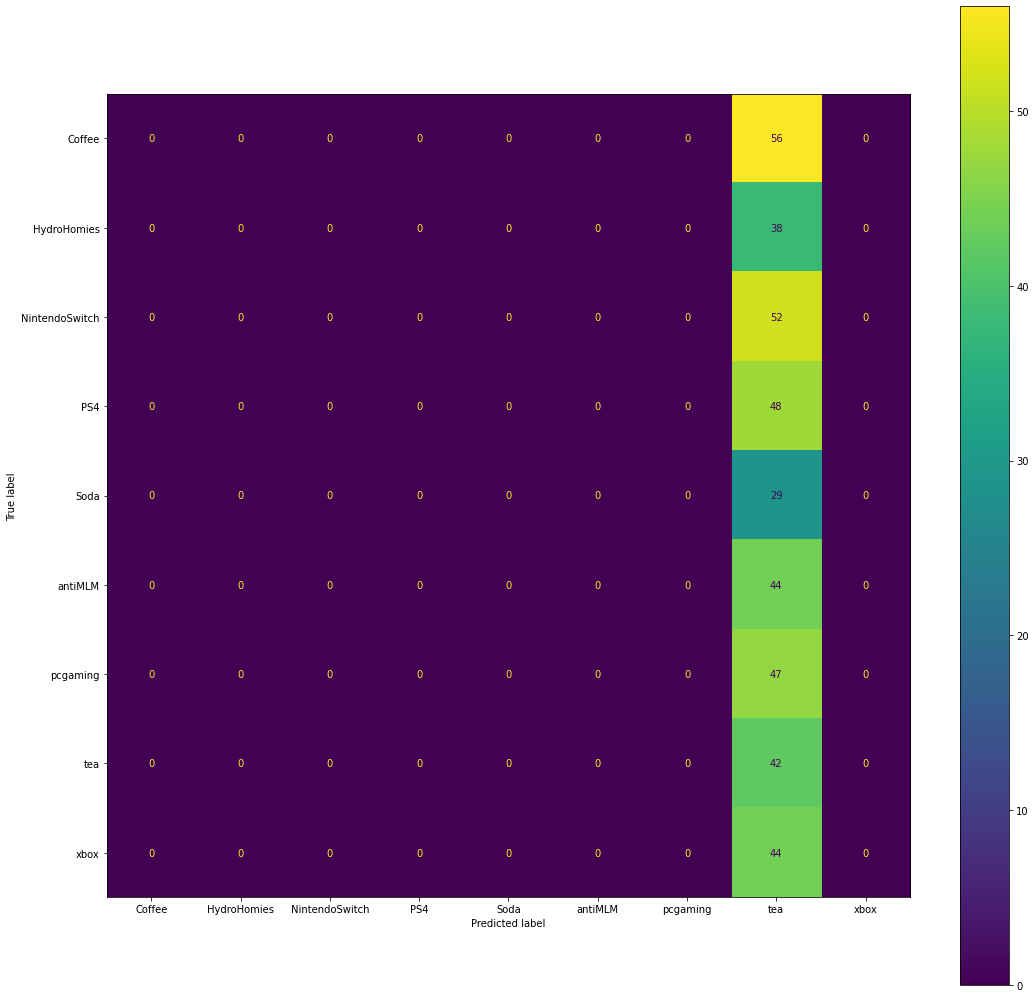

In [ ]:
import numpy as np
import spacy
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.linear_model import LogisticRegression

nltk.download('stopwords')
warnings.filterwarnings('ignore')

X_train = train_dataframe['body']
y_train = train_dataframe['subreddit']
X_validation = validation_dataframe['body']
y_validation= validation_dataframe['subreddit']
X_test = test_dataframe['body']
y_test = test_dataframe['subreddit']
#Dummy Classifier with strategy="most_frequent
dummy_clf_most_frequent = DummyClassifier(strategy="most_frequent")
dummy_clf_most_frequent.fit(X_train, y_train)
y_pred = dummy_clf_most_frequent.predict(X_test)
dummy_clf_most_frequent.score(X_test, y_test)
print('Dummy Classifier with strategy=most_frequent')
print(classification_report(y_test, y_pred, target_names=subreddit_list,zero_division=0))
cm = confusion_matrix(y_test, y_pred, labels=dummy_clf_most_frequent.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dummy_clf_most_frequent.classes_)
fig, ax = plt.subplots(figsize=(18,18))
disp.plot(ax=ax)

Dummy Classifier with strategy=stratified
                precision    recall  f1-score   support

        Coffee       0.09      0.07      0.08        56
   HydroHomies       0.12      0.16      0.14        38
NintendoSwitch       0.19      0.17      0.18        52
           PS4       0.14      0.15      0.14        48
          Soda       0.06      0.07      0.06        29
       antiMLM       0.13      0.11      0.12        44
      pcgaming       0.12      0.13      0.12        47
           tea       0.24      0.26      0.25        42
          xbox       0.10      0.09      0.09        44

      accuracy                           0.14       400
     macro avg       0.13      0.13      0.13       400
  weighted avg       0.13      0.14      0.13       400



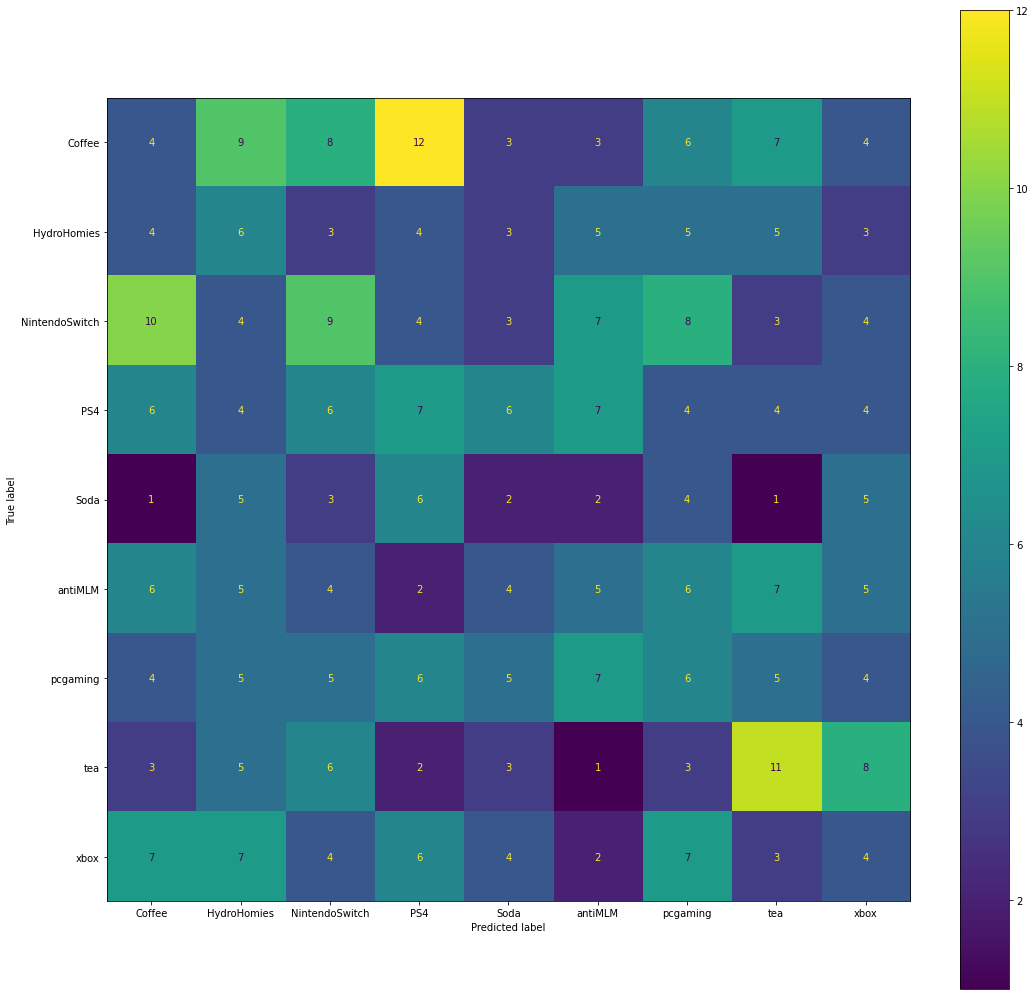

In [ ]:
#Dummy Classifier with strategy="stratified"
dummy_clf_stratified = DummyClassifier(strategy="stratified")
dummy_clf_stratified.fit(X_train, y_train)
y_pred = dummy_clf_stratified.predict(X_test)
print('Dummy Classifier with strategy=stratified')
print(classification_report(y_test, y_pred, target_names=subreddit_list,zero_division=0))
cm = confusion_matrix(y_test, y_pred, labels=dummy_clf_stratified.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dummy_clf_stratified.classes_)
fig, ax = plt.subplots(figsize=(18,18))
disp.plot(ax=ax)

LogisticRegression with One-hot vectorization
                precision    recall  f1-score   support

        Coffee       0.83      0.86      0.84        56
   HydroHomies       0.74      0.89      0.81        38
NintendoSwitch       0.86      0.71      0.78        52
           PS4       0.56      0.71      0.62        48
          Soda       0.70      0.79      0.74        29
       antiMLM       0.91      0.73      0.81        44
      pcgaming       0.62      0.55      0.58        47
           tea       0.90      0.86      0.88        42
          xbox       0.79      0.75      0.77        44

      accuracy                           0.76       400
     macro avg       0.77      0.76      0.76       400
  weighted avg       0.77      0.76      0.76       400



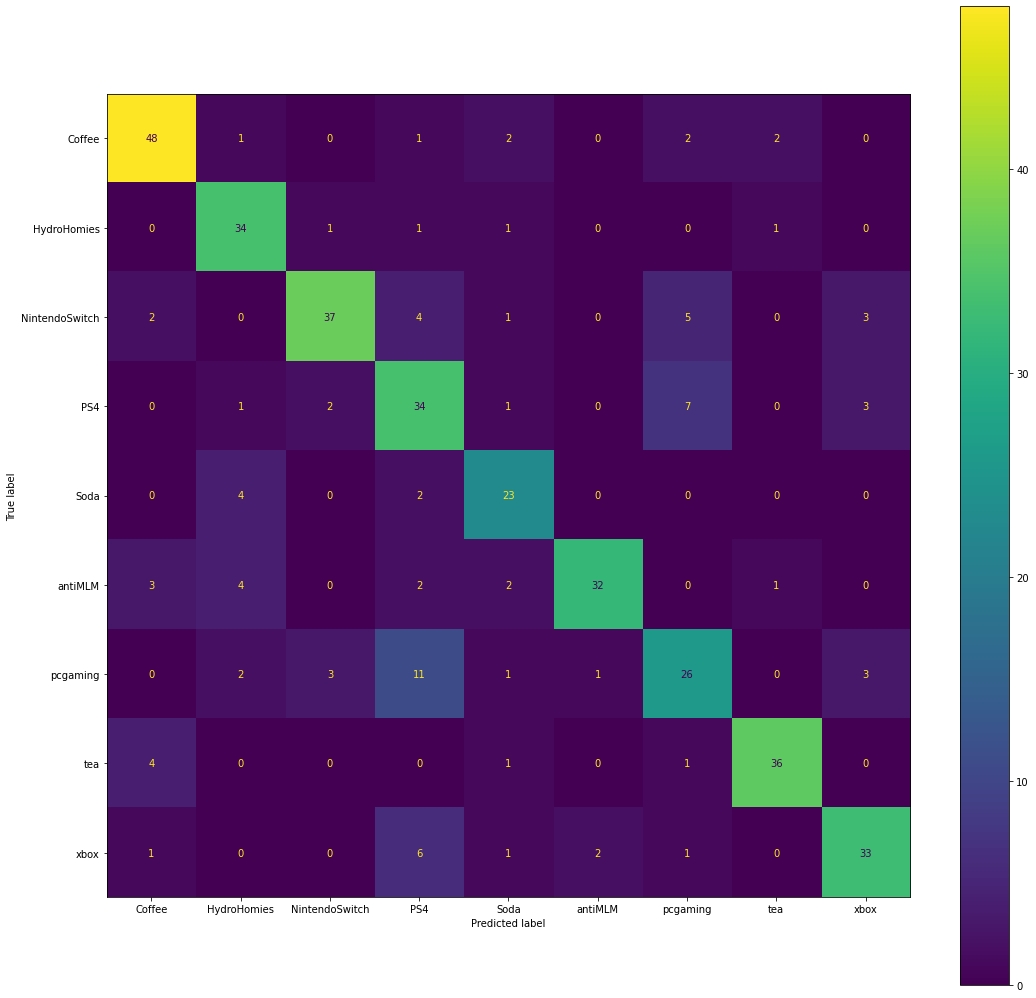

In [ ]:
 #LogisticRegression with One-hot vectorization
nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')

def text_pipeline_spacy(text):
    tokens = []
    doc = nlp(text)
    for t in doc:
        if not t.is_stop and not t.is_punct and not t.is_space:
            tokens.append(t.lemma_.lower())
    return tokens

one_hot_vectorizer = CountVectorizer(tokenizer=text_pipeline_spacy, binary=True)
train_features = one_hot_vectorizer.fit_transform(X_train)
validation_features = one_hot_vectorizer.transform(X_validation)
test_features = one_hot_vectorizer.transform(X_test)
LR_clf_onehot = LogisticRegression(random_state=0)
LR_clf_onehot.fit(train_features, y_train)
y_pred = LR_clf_onehot.predict(test_features)

print('LogisticRegression with One-hot vectorization')
print(classification_report(y_test, y_pred, target_names=subreddit_list,zero_division=0))
cm = confusion_matrix(y_test, y_pred, labels=LR_clf_onehot.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR_clf_onehot.classes_)
fig, ax = plt.subplots(figsize=(18,18))
disp.plot(ax=ax)

LogisticRegression with TF_IDF vectorization
                precision    recall  f1-score   support

        Coffee       0.91      0.91      0.91        56
   HydroHomies       0.91      0.79      0.85        38
NintendoSwitch       0.69      0.79      0.74        52
           PS4       0.56      0.69      0.62        48
          Soda       0.79      0.90      0.84        29
       antiMLM       0.84      0.82      0.83        44
      pcgaming       0.68      0.57      0.62        47
           tea       0.90      0.88      0.89        42
          xbox       0.81      0.66      0.73        44

      accuracy                           0.78       400
     macro avg       0.79      0.78      0.78       400
  weighted avg       0.78      0.78      0.78       400



(1200, 8781)

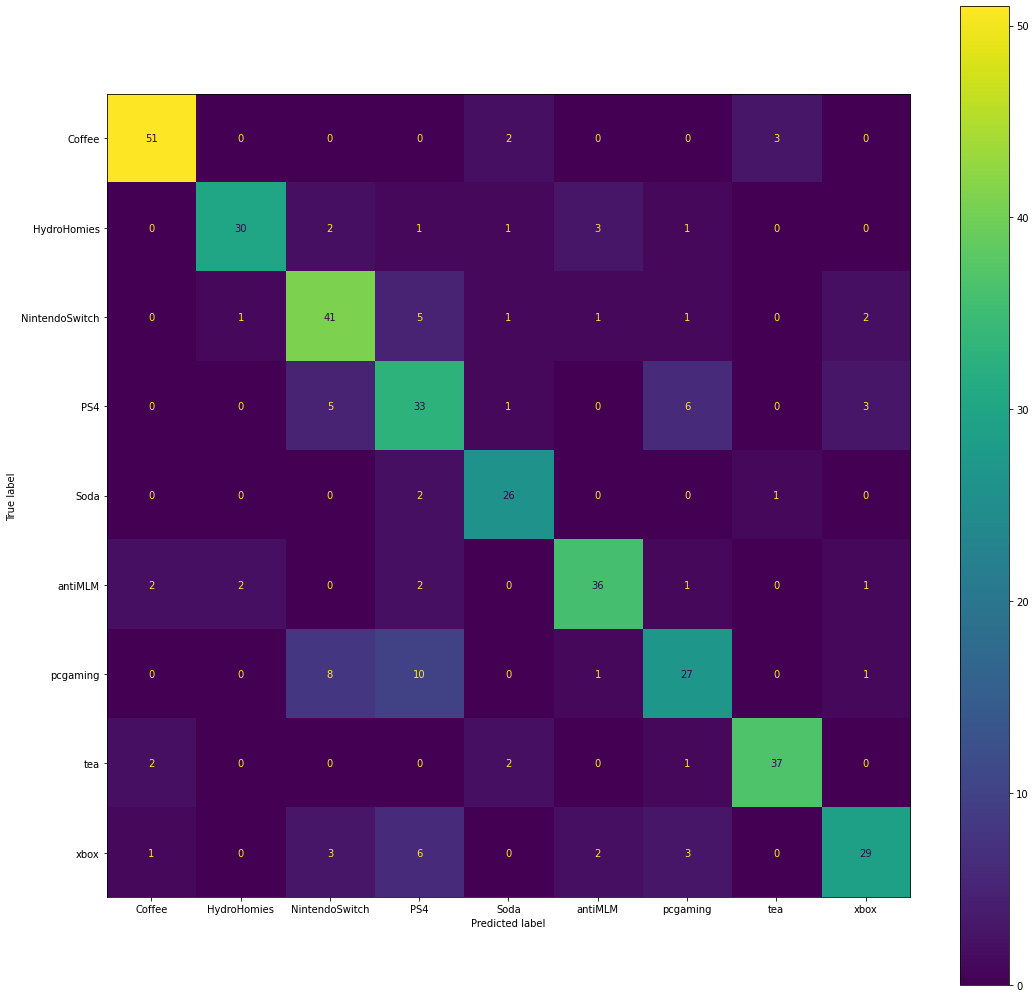

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

TF_IDF_vectorizer = TfidfVectorizer()
train_features = TF_IDF_vectorizer.fit_transform(X_train)
validation_features = TF_IDF_vectorizer.transform(X_validation)
test_features = TF_IDF_vectorizer.transform(X_test)
LR_clf_TD_IDF = LogisticRegression(random_state=0)
LR_clf_TD_IDF.fit(train_features, y_train)
y_pred = LR_clf_TD_IDF.predict(test_features)

print('LogisticRegression with TF_IDF vectorization')
print(classification_report(y_test, y_pred, target_names=subreddit_list,zero_division=0))
cm = confusion_matrix(y_test, y_pred, labels=LR_clf_TD_IDF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR_clf_TD_IDF.classes_)
fig, ax = plt.subplots(figsize=(18,18))
disp.plot(ax=ax)
train_features.shape

SVC with One-hot vectorization
                precision    recall  f1-score   support

        Coffee       0.96      0.86      0.91        56
   HydroHomies       1.00      0.76      0.87        38
NintendoSwitch       0.71      0.77      0.74        52
           PS4       0.45      0.73      0.56        48
          Soda       0.88      0.79      0.84        29
       antiMLM       0.85      0.77      0.81        44
      pcgaming       0.47      0.57      0.52        47
           tea       0.97      0.86      0.91        42
          xbox       0.85      0.52      0.65        44

      accuracy                           0.74       400
     macro avg       0.80      0.74      0.75       400
  weighted avg       0.79      0.74      0.75       400



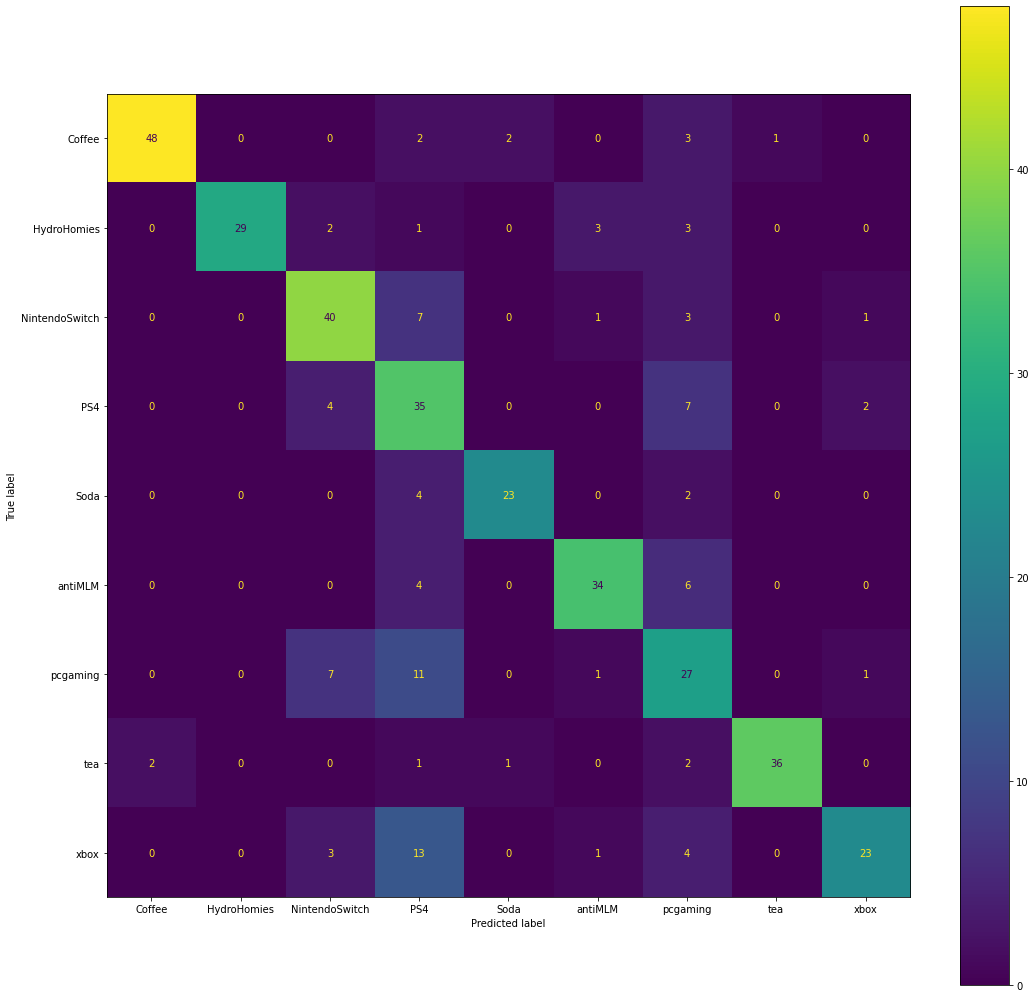

In [ ]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

SVC_clf_onehot = svm.SVC()
SVC_clf_onehot.fit(train_features, y_train)
y_pred = SVC_clf_onehot.predict(test_features)

print('SVC with One-hot vectorization')
print(classification_report(y_test, y_pred, target_names=subreddit_list,zero_division=0))
cm = confusion_matrix(y_test, y_pred, labels=SVC_clf_onehot.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVC_clf_onehot.classes_)
fig, ax = plt.subplots(figsize=(18,18))
disp.plot(ax=ax)

### Q1c:

RF with count vectorization
                precision    recall  f1-score   support

        Coffee       0.94      0.89      0.92        56
   HydroHomies       0.67      0.95      0.78        38
NintendoSwitch       0.81      0.67      0.74        52
           PS4       0.49      0.69      0.57        48
          Soda       1.00      0.76      0.86        29
       antiMLM       0.86      0.73      0.79        44
      pcgaming       0.69      0.53      0.60        47
           tea       0.90      0.90      0.90        42
          xbox       0.71      0.73      0.72        44

      accuracy                           0.76       400
     macro avg       0.79      0.76      0.76       400
  weighted avg       0.78      0.76      0.76       400



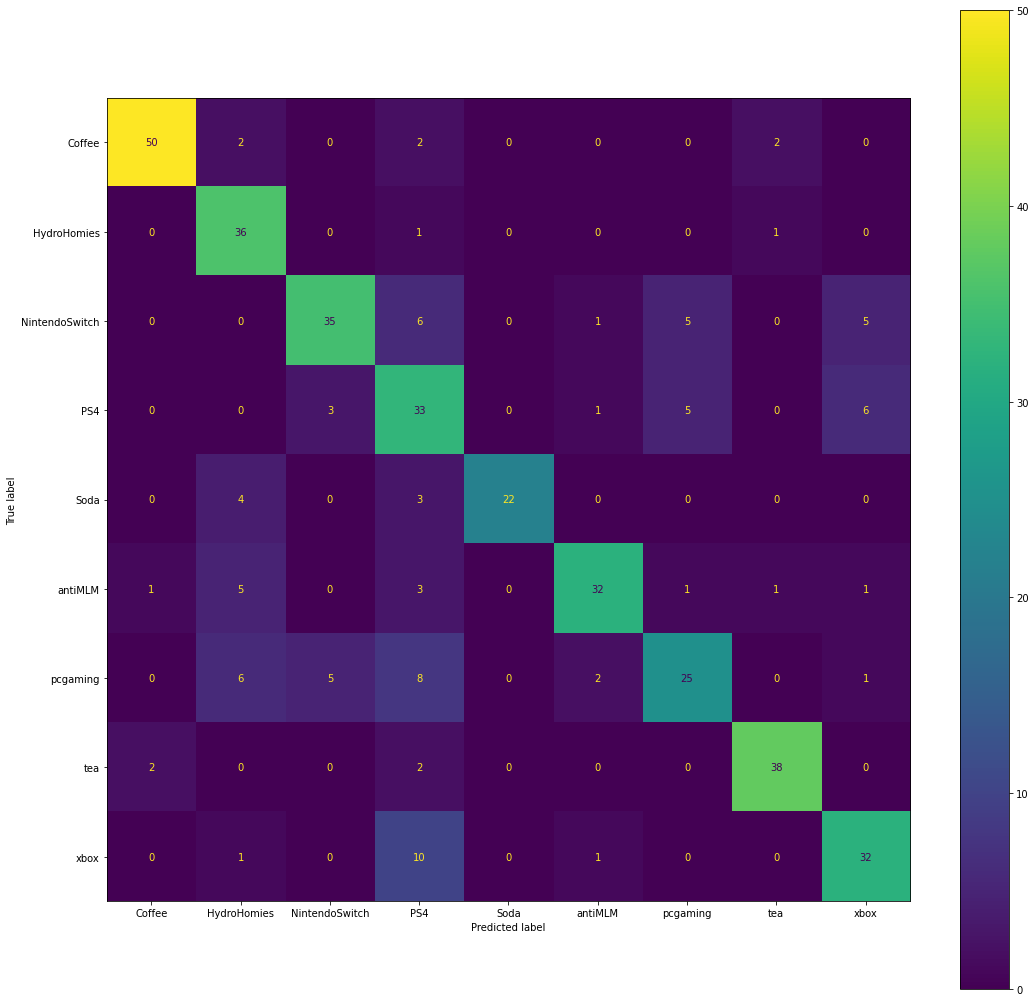

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

count_vectorizer = CountVectorizer(tokenizer=text_pipeline_spacy)

train_features = count_vectorizer.fit_transform(X_train)
validation_features = count_vectorizer.transform(X_validation)
test_features = count_vectorizer.transform(X_test)

RF_clf_count = RandomForestClassifier()
RF_clf_count.fit(train_features, y_train)
y_pred = RF_clf_count.predict(test_features)

print('RF with count vectorization')
print(classification_report(y_test, y_pred, target_names=subreddit_list,zero_division=0))
cm = confusion_matrix(y_test, y_pred, labels=RF_clf_count.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF_clf_count.classes_)
fig, ax = plt.subplots(figsize=(18,18))
disp.plot(ax=ax)

## Q2:

### Q2a:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#TF_IDF_vectorizer = TfidfVectorizer(sublinear_tf = True)
C_list = []
init_C = 10**-3
while (init_C <= 10**5):
    C_list.append(init_C)
    init_C*=10


TF_IDF_vectorizer = TfidfVectorizer()
train_features = TF_IDF_vectorizer.fit_transform(X_train)
validation_features = TF_IDF_vectorizer.transform(X_validation)
test_features = TF_IDF_vectorizer.transform(X_test)

parameters = { 'C':C_list}
LR = LogisticRegression()
LR_clf_TD_IDF =  GridSearchCV(LR, parameters,return_train_score=True)
LR_clf_TD_IDF.fit(train_features, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,
                               10000.0, 100000.0]},
             return_train_score=True)

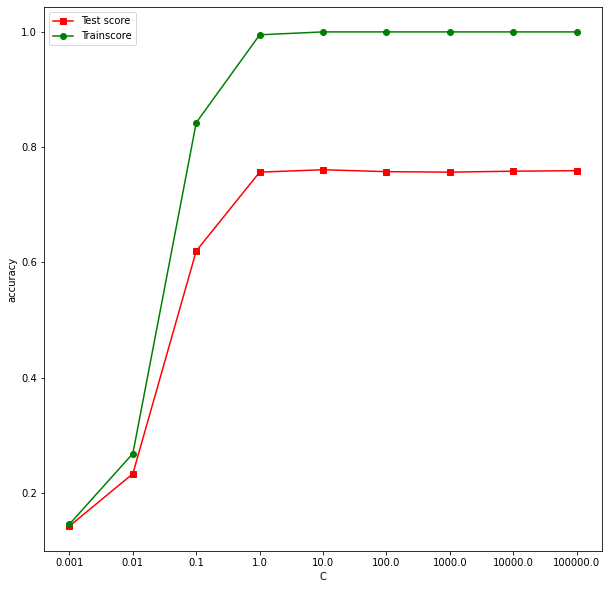

In [ ]:
C_list_plot = []
init_C = 10**-3
while (init_C <= 10**5):
    C_list_plot.append(str(init_C))
    init_C*=10
LR_clf_TD_IDF.cv_results_
plt.figure(figsize=(10, 10))
plt.plot(C_list_plot, LR_clf_TD_IDF.cv_results_['mean_test_score'],'s-',color='r',label='Test score')
plt.plot(C_list_plot, LR_clf_TD_IDF.cv_results_['mean_train_score'],'o-',color='g',label='Trainscore')
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(loc = "best")
plt.show()

In [ ]:
N_list = []
init_N = 500
while (init_N <= 8781):
    N_list.append(init_N)
    init_N+=500
N_list.append(8781)
pipeline = Pipeline([('vect', TfidfVectorizer()),('clf', LogisticRegression(C=1))])
parameters = [{'vect__max_features': N_list, 'vect__sublinear_tf': (True,False)}]
TF_IDF_Nfeatures_sublinear = GridSearchCV(pipeline, parameters,return_train_score=True)
TF_IDF_Nfeatures_sublinear.fit(X_train, y_train)
TF_IDF_Nfeatures_sublinear.cv_results_

{'mean_fit_time': array([0.17005148, 0.15953493, 0.17853518, 0.19065661, 0.30035801,
        0.29687438, 0.33147898, 0.2952848 , 0.34145246, 0.47639918,
        0.36607184, 0.37569451, 0.36131454, 0.6580822 , 0.42028294,
        0.44490757, 0.44853096, 0.47630391, 0.54065638, 0.55558395,
        0.54875689, 0.56473327, 0.53928423, 0.59372783, 0.54842205,
        0.60019388, 0.56093826, 0.61898885, 0.626475  , 0.67457824,
        0.59938068, 0.63616538, 0.57785997, 0.66271596, 0.62045164,
        0.64375129]),
 'mean_score_time': array([0.01573892, 0.01470203, 0.01439366, 0.01378107, 0.0306529 ,
        0.03468986, 0.02959452, 0.03465767, 0.03389463, 0.04096074,
        0.03077736, 0.02928624, 0.03495355, 0.06116228, 0.03677206,
        0.03593469, 0.04045038, 0.03802276, 0.0399292 , 0.03286037,
        0.03671908, 0.03161917, 0.04656491, 0.03688536, 0.0402945 ,
        0.04320564, 0.03276772, 0.03265848, 0.04842391, 0.03015299,
        0.03646517, 0.02520061, 0.04137845, 0.03520522, 0.

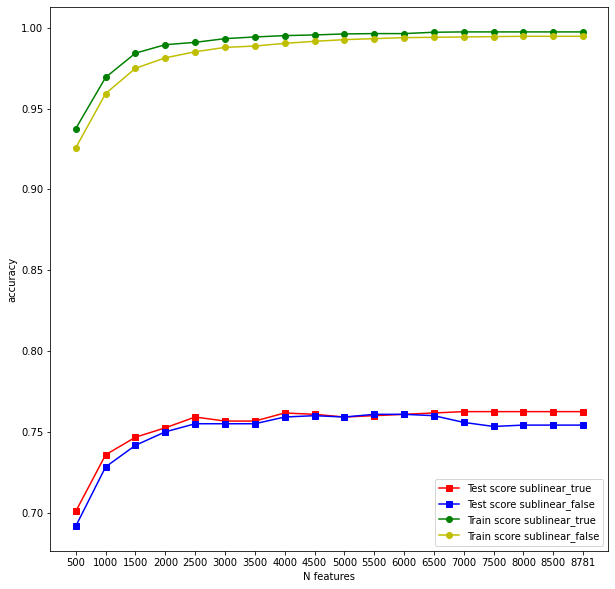

In [ ]:
N_list_plot = []
init_N = 500
while (init_N <= 8781):
    N_list_plot.append(str(init_N))
    init_N+=500
N_list_plot.append('8781')
#TF_IDF_Nfeatures_sublinear.cv_results_
plt.figure(figsize=(10, 10))
plt.plot(N_list_plot , TF_IDF_Nfeatures_sublinear.cv_results_['mean_test_score'][::2],'s-',color='r',label='Test score sublinear_true')
plt.plot(N_list_plot , TF_IDF_Nfeatures_sublinear.cv_results_['mean_test_score'][1::2],'s-',color='b',label='Test score sublinear_false')
plt.plot(N_list_plot , TF_IDF_Nfeatures_sublinear.cv_results_['mean_train_score'][::2],'o-',color='g',label='Train score sublinear_true')
plt.plot(N_list_plot , TF_IDF_Nfeatures_sublinear.cv_results_['mean_train_score'][1::2],'o-',color='y',label='Train score sublinear_false')
plt.xlabel("N features")
plt.ylabel("accuracy")
plt.legend(loc = "best")
plt.show()

In [ ]:
TF_IDF_Nfeatures_sublinear.cv_results_['params'][TF_IDF_Nfeatures_sublinear.cv_results_['mean_test_score'].argmax()]

{'vect__max_features': 7000, 'vect__sublinear_tf': True}

LogisticRegression with One-hot vectorization
                precision    recall  f1-score   support

        Coffee       0.96      0.89      0.93        56
   HydroHomies       0.85      0.89      0.87        38
NintendoSwitch       0.75      0.87      0.80        52
           PS4       0.61      0.71      0.65        48
          Soda       0.96      0.76      0.85        29
       antiMLM       0.86      0.82      0.84        44
      pcgaming       0.58      0.53      0.56        47
           tea       0.80      0.93      0.86        42
          xbox       0.89      0.70      0.78        44

      accuracy                           0.79       400
     macro avg       0.81      0.79      0.79       400
  weighted avg       0.80      0.79      0.79       400



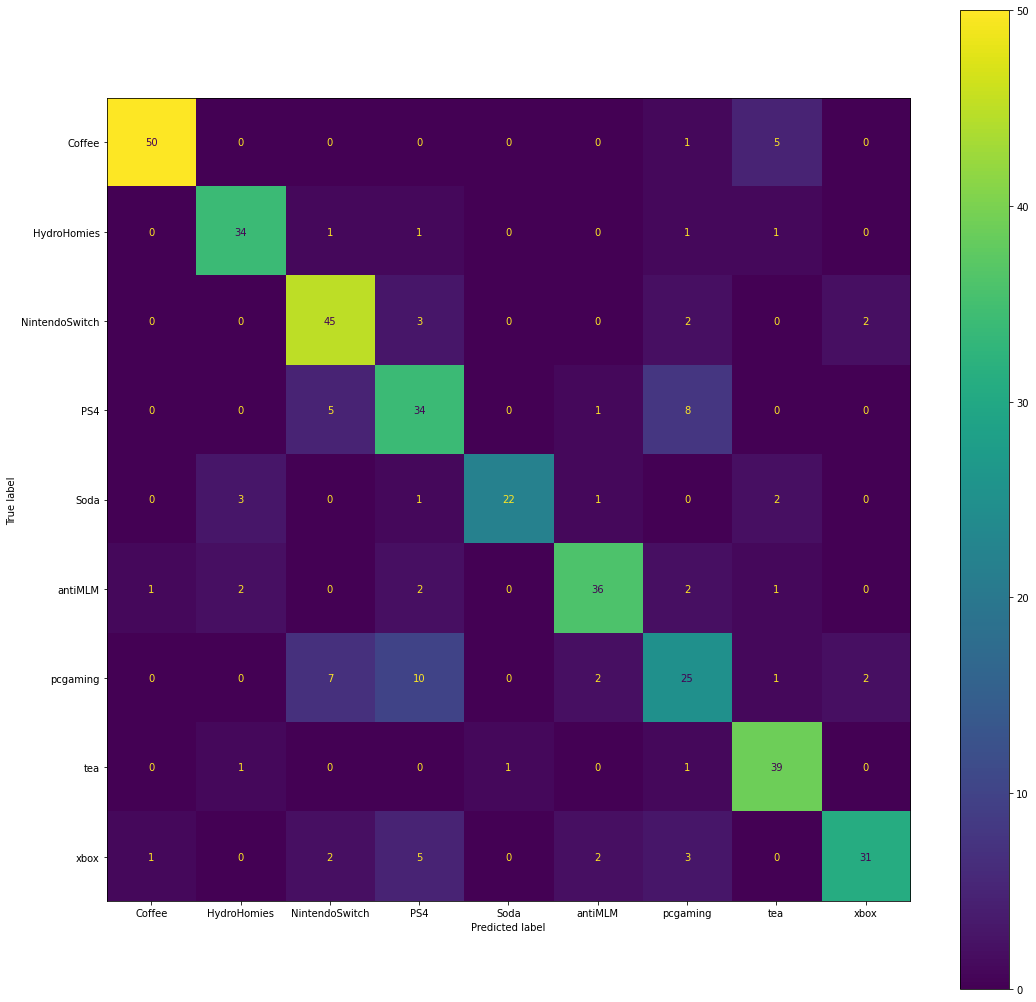

In [ ]:
TF_IDF_vectorizer_spacy = TfidfVectorizer(max_features=7500,tokenizer=text_pipeline_spacy, binary=True, sublinear_tf=True)
train_features = TF_IDF_vectorizer_spacy.fit_transform(X_train)
validation_features = TF_IDF_vectorizer_spacy.transform(X_validation)
test_features = TF_IDF_vectorizer_spacy.transform(X_test)
LR_clf_tfidf_spacy = LogisticRegression(C=1)
LR_clf_tfidf_spacy.fit(train_features, y_train)
y_pred = LR_clf_tfidf_spacy.predict(test_features)

print('LogisticRegression with One-hot vectorization')
print(classification_report(y_test, y_pred, target_names=subreddit_list,zero_division=0))
cm = confusion_matrix(y_test, y_pred, labels=LR_clf_tfidf_spacy.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR_clf_tfidf_spacy.classes_)
fig, ax = plt.subplots(figsize=(18,18))
disp.plot(ax=ax)

### Q2b:

In [ ]:
error_index_list = []
for i in range (len(y_pred)):
    if y_pred[i] != y_test[i] and (y_test[i] == 'PS4' or y_test[i] == 'pcgaming'):
        error_index_list.append(i)
error_title_list = []
error_wrong_subreddit_list = []
error_body_list = []
error_correct_subreddit_list = []
for i in error_index_list:
    error_title_list.append(test_dataframe['title'][i])
    error_wrong_subreddit_list.append(y_pred[i])
    error_body_list.append(test_dataframe['body'][i])
    error_correct_subreddit_list.append(test_dataframe['subreddit'][i])

d = {'Title':error_title_list, 'WrongSubreddit': error_wrong_subreddit_list, 'CorrectSubreddit': error_correct_subreddit_list, 'Body': error_body_list}
df = pd.DataFrame(data=d)
df

,Title,WrongSubreddit,CorrectSubreddit,Body
0,Fanatical Sci-fi Mystery Bundle (Steam Keys) (...,PS4,pcgaming,STAR WARS Jedi Knight - Jedi Academy \nP5XCR-V...
1,The Witcher 3: 100hrs gameplay Q&A,pcgaming,PS4,Daniel Bloodworth(he reviewed the game for Gam...
2,[DEAL] Bloodborne $25 at H-E-B plus (U.S/TX),pcgaming,PS4,"Just heads up if you're interested, not my typ..."
3,3D Aim Trainer Goals,NintendoSwitch,pcgaming,so basically I'm trying to improve my aim in s...
4,"FYI, Today is the last day to purchase Final F...",PS4,pcgaming,https://store.steampowered.com/app/382890/FINA...
5,How can I get better at positioning and awaren...,NintendoSwitch,pcgaming,I enjoy the Battlefield games a lot. They're ...
6,Inverted or normal Y Axis?,pcgaming,PS4,I prefer inverted but I feel like all the olde...
7,Heads up. GMGs 20% off coupon works on sale it...,PS4,pcgaming,Winter-sale20-grogre for 20% off over at green...
8,Is there still no way to get DS4's rumble and ...,pcgaming,PS4,I was wondering if by now someone had found a ...
9,"PC gamers with a Switch, do you see yourself b...",NintendoSwitch,pcgaming,Sonic Forces is probably gonna be a must-get f...


## Q3:

### Q3a:

In [ ]:
train_dataframe['full_query'] = train_dataframe['title'] + ' ' + train_dataframe['body']+' ' + train_dataframe['author']
test_dataframe['full_query'] = test_dataframe['title'] + ' ' + test_dataframe['body']+' ' + test_dataframe['author']

vectorizer_spacy = TfidfVectorizer(tokenizer=text_pipeline_spacy, binary=True, sublinear_tf=True)
train_features = TF_IDF_vectorizer_spacy.fit_transform(train_dataframe['full_query'].tolist())
test_features = TF_IDF_vectorizer_spacy.transform(test_dataframe['full_query'].tolist())
train_features

<1200x7500 sparse matrix of type '<class 'numpy.float64'>'
	with 38262 stored elements in Compressed Sparse Row format>

### Q3b:

In [ ]:
N_list = []
init_N = 500
while (init_N <= 7500):
    N_list.append(init_N)
    init_N+=500
N_list.append(7500)

C_list = []
init_C = 10**-1
while (init_C <= 10):
    C_list.append(init_C)
    init_C*=10

pipeline = Pipeline([('vect', TfidfVectorizer(tokenizer=text_pipeline_spacy, binary=True, sublinear_tf=True)),('clf', LogisticRegression())])
parameters = [{'vect__max_features': N_list, 'clf__C':C_list}]
grid_cv_q3 = GridSearchCV(pipeline, parameters,return_train_score=True)
grid_cv_q3.fit(train_dataframe['full_query'], y_train)
grid_cv_q3.cv_results_

{'mean_fit_time': array([0.2890142 , 0.3020864 , 0.33694391, 0.34522057, 0.35188637,
        0.34482241, 0.36337128, 0.37826829, 0.41767778, 0.41076002,
        0.40937457, 0.4411262 , 0.42235718, 0.42283149, 0.42148323,
        0.42737274, 0.33324132, 0.35335188, 0.45696249, 0.48913279,
        0.47984877, 0.51989365, 0.55910492, 0.56243825, 0.61375027,
        0.61144919, 0.63315854, 0.6880652 , 0.69292469, 0.75434771,
        0.73009176, 0.75415778, 0.40568223, 0.44396729, 0.65415368,
        0.73095961, 0.74530392, 0.8617981 , 0.92602215, 0.92025108,
        0.94831796, 1.06738634, 1.14892879, 1.08958478, 1.29186149,
        1.28815169, 1.36663828, 1.45283089]),
 'mean_score_time': array([0.06315408, 0.06650052, 0.11425447, 0.10363083, 0.11124964,
        0.11213822, 0.11689343, 0.11480174, 0.12661247, 0.10389352,
        0.12437062, 0.1120616 , 0.11718397, 0.1144855 , 0.11679616,
        0.11264429, 0.0627955 , 0.06330194, 0.11423397, 0.11498833,
        0.12214909, 0.10977721, 0.

In [ ]:
grid_cv_q3.cv_results_['mean_test_score'][45]
grid_cv_q3.cv_results_['params'][45]

{'clf__C': 10.0, 'vect__max_features': 7000}

### Q3c:

                precision    recall  f1-score   support

        Coffee       0.98      0.95      0.96        56
   HydroHomies       0.94      0.89      0.92        38
NintendoSwitch       0.82      0.87      0.84        52
           PS4       0.69      0.79      0.74        48
          Soda       0.93      0.97      0.95        29
       antiMLM       0.89      0.89      0.89        44
      pcgaming       0.70      0.64      0.67        47
           tea       0.91      0.95      0.93        42
          xbox       0.92      0.82      0.87        44

      accuracy                           0.86       400
     macro avg       0.86      0.86      0.86       400
  weighted avg       0.86      0.86      0.86       400



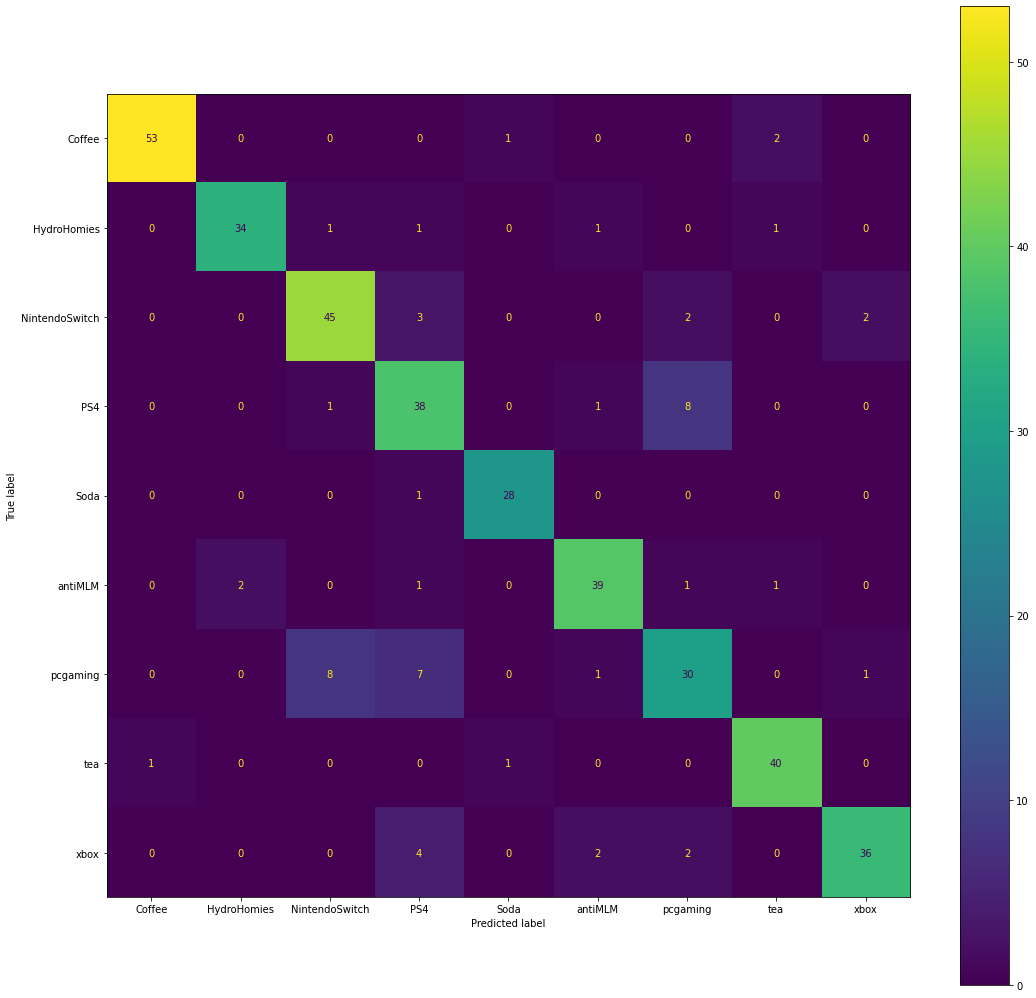

In [ ]:
Best_vec= TfidfVectorizer(max_features=7000,tokenizer=text_pipeline_spacy, binary=True, sublinear_tf=True)
train_features = Best_vec.fit_transform(train_dataframe['full_query'])
test_features = Best_vec.transform(test_dataframe['full_query'])
Best_flc = LogisticRegression(C=10)
Best_flc.fit(train_features, y_train)
y_pred = Best_flc.predict(test_features)

print(classification_report(y_test, y_pred, target_names=subreddit_list,zero_division=0))
cm = confusion_matrix(y_test, y_pred, labels=Best_flc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Best_flc.classes_)
fig, ax = plt.subplots(figsize=(18,18))
disp.plot(ax=ax)